# мне нужен Nav1.7
https://sci-hub.ru/10.1212/WNL.0000000000001382

https://physoc.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1113%2Fjphysiol.2006.127027&file=TJP2222_suppl_mat.pdf
# Kv1.1

### Kv1.2
https://channelpedia.epfl.ch/wikipages/ionchannels/2/#Functional


### Nav1.1
https://journals.physiology.org/doi/full/10.1152/jn.00982.2003?rfr_dat=cr_pub++0pubmed&url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org



$$\frac{1.0}{1+ \exp(\frac{v - -21.0}{-11.3943})} - m_{\infty}$$

$$\frac{150.0}{1+ \exp(\frac{v - -67.56}{34.1479})} - m_{\tau}$$

$$\frac{1.0}{1+ \exp(\frac{v - -22.0}{11.3943})} - h_{\infty}$$

$$\frac{15000.0}{1+ \exp(\frac{v - -46.56}{-44.1479})} - h_{\tau}$$

---


In [1]:
import scienceplots

from brian2 import *

prefs.codegen.target = "numpy"
plt.style.use(["science", "no-latex"])

mpower	1.0
m Inf	1.0000/(1+ exp((v - -30.5000)/-11.3943))
m Tau	30.0000/(1+ exp((v - -76.5600)/26.1479))
hpower	2.0
h Inf	1.0000/(1+ exp((v - -30.0000)/27.3943))
h Tau	15000.0000/(1+ exp((v - -160.5600)/-100.0000))

In [67]:
start_scope()

gl = 5 * nS  # arbitrary, in order of examples
El = -70 * mV
_gK = 40 * nS  # from HH brian example
EK = -65 * mV  # channel pedia
Cm = 20 * pF  # from HH brian example
ENa = 55 * mV
_gNa = 50 * nS  # arbitrary
mna_tau = 0.15*ms

eqs = Equations("""
dv/dt = (- gl * (v - El) - gK * (v - EK) - gNa * (v - ENa) + I) / Cm : volt
I : ampere
""")
gK_eq = Equations("""
gK = _gK * m * h**2 : siemens

dm/dt = (m0 - m) / m_tau : 1
m0 = 1 / (1 + exp((v/mV + 30.5)/-11.4)) : 1
m_tau = 30*ms / (1 + exp((v/mV + 76.56)/26.15)) : second

dh/dt = (h0 - h) / h_tau : 1
h0 = 1 / (1 + exp((v/mV + 30)/27.4)) : 1
h_tau = 15_000*ms / (1 + exp((v/mV + 160.56)/-100.)) : second
""")

gNa_eq = Equations("""
gNa = _gNa * mna**3 * hna : siemens

dmna/dt = (mna0 - mna) / mna_tau : 1
mna0 = 1 / (1 + exp(-(v/mV + 21.2)/4.9)) : 1

dhna/dt = (hna0 - hna) / hna_tau : 1
hna0 = 1 / (1 + exp((v/mV + 39.7)/7.7)) : 1
hna_tau = 20.1*ms * exp(-0.5 * ((v/mV + 61.4)/32.7)**2) : second
""")

neuron = NeuronGroup(1, eqs+gK_eq+gNa_eq, method="euler")
vmon = StateMonitor(neuron, ["v"], True)
gatemon = StateMonitor(neuron, ["m", "h", "mna", "hna"], True)

neuron.v = El
neuron.I = 0 * pA

run(100*ms)
store("init")
neuron.I = 50 * pA
run(20*ms)
neuron.I = 0 * pA
run(50*ms)

Text(0.5, 0, 'time, ms')

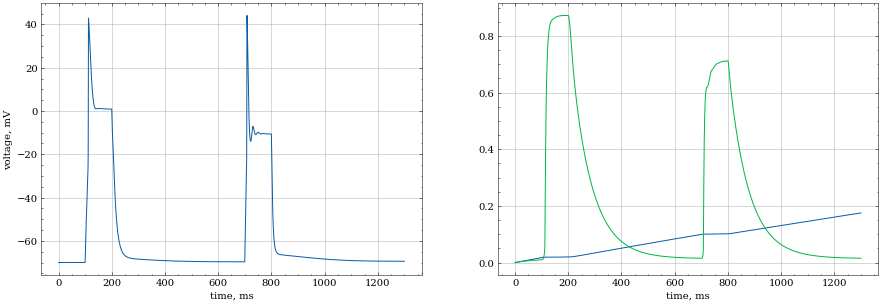

In [68]:
figure(figsize=(15, 5))
subplot(121)
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel('time, ms')
ylabel('voltage, mV')
grid()
subplot(122)
plot(stmon.t/ms, stmon.h[0])
plot(stmon.t/ms, stmon.m[0])
grid()
xlabel('time, ms')

Text(0.5, 0, 'time, ms')

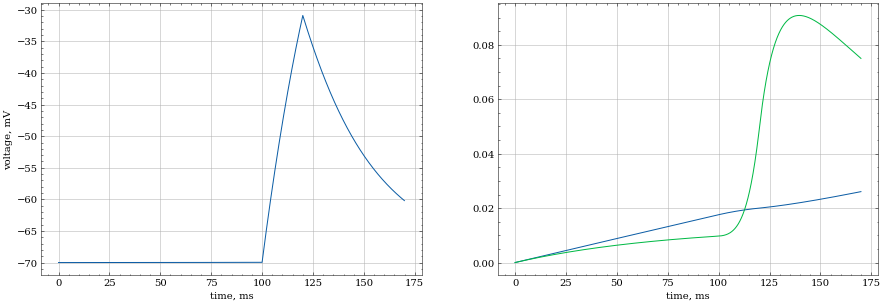

In [6]:
# without Na
figure(figsize=(15, 5))
subplot(121)
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel('time, ms')
ylabel('voltage, mV')
grid()
subplot(122)
plot(stmon.t/ms, stmon.h[0])
plot(stmon.t/ms, stmon.m[0])
grid()
xlabel('time, ms')

In [50]:
gatemon.record_variables

['m', 'h', 'mna', 'hna']

In [52]:
for var in gatemon:
    print((var))

<StateMonitorView, giving access to elements 0 recorded by statemonitor>


In [58]:
gatemon.__getattr__('m')

array([[0.00000000e+00, 1.72636675e-05, 3.45051105e-05, ...,
        3.88677119e-02, 3.88380895e-02, 3.88084889e-02]])

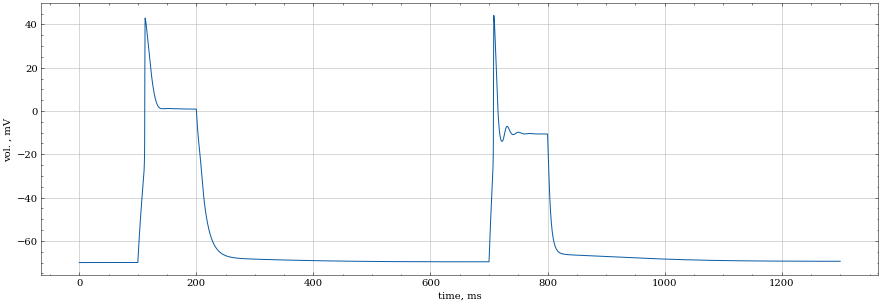

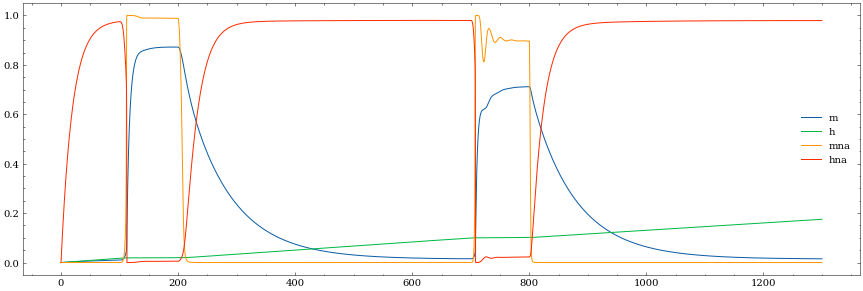

In [61]:
restore("init")

for cur in [100, 150]*pA:
    neuron.I = cur
    run(100*ms)
    neuron.I = 0*pA
    run(500*ms)
    
figure(figsize=(15, 5))
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("vol. , mV")
grid()

figure(figsize=(15, 5))
for var in gatemon.record_variables:
    plot(gatemon.t/ms, getattr(gatemon, var)[0])
    
legend(gatemon.record_variables)

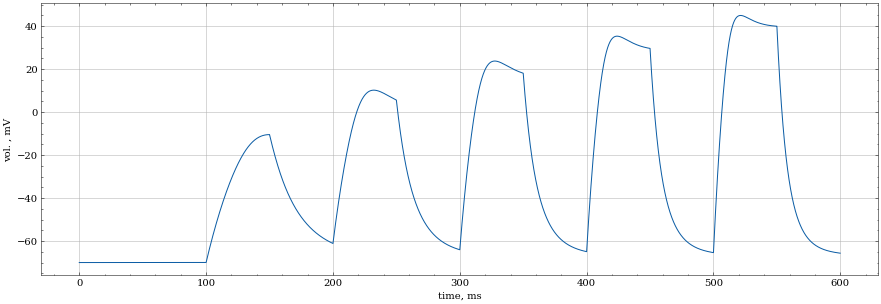

In [7]:
# list of currents
# without Na
restore("init")

for cur in [50, 100, 150, 200, 250]*pA:
    neuron.I = cur
    run(50*ms)
    neuron.I = 0*pA
    run(50*ms)
    
figure(figsize=(15, 5))
plot(stmon.t/ms, stmon.v[0]/mV)
xlabel("time, ms")
ylabel("vol. , mV")
grid()